# readme
descrip: test python compute geostrophic vel functions

update history: <br>
v1.0 DL 2021May10 <br>

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
# import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe
import seawater as sw

# from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

import Funcs4SeaLevelCESM 

# read data

In [2]:
# North Atlantic
lat1, lat2 = 20, 65 
lon1, lon2 = -85, -15 # 85W - 15W 
np.set_printoptions(precision=4)

read SSH files

In [3]:
infile_ssh_obs = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
              'raw_data/zos_AVISO_L4_199210-201012.nc.nc4')
ds_ssh_obs = xr.open_dataset(infile_ssh_obs)
ds_ssh_obs

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lon: 360, time: 219)
Coordinates:
  * time       (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    zos        (time, lat, lon) float32 ...
Attributes: (12/29)
    institution:                     Centre National d'Etudes Spatiales
    institute_id:                    CNES
    experiment_id:                   obs
    source:                          SSALTO/DUACS
    model_id:                        Obs-AVISO
    contact:                         AVISO User Service, aviso@oceanobs.com
    ...                              ...
    project_id:                      obs4MIPs
    table_id:                        Table Omon_obs (31 January 2011) 3852a2b...
    title:                           Obs-AVISO model output prepared for obs4...
    modeling_realm:                  ocean
    cmor_version:                    2.5.3
    DODS_EXTRA.Unlimited_Dimension:  time

# data analysis

In [4]:
ssh1_NA_obs = ds_ssh_obs.zos.isel(time=0).sel(lat=slice(lat1, lat2),lon=slice(lon1+360, lon2+360))
ssh1_NA_obs

<xarray.DataArray 'zos' (lat: 45, lon: 70)>
array([[ 0.663341,  0.683989,  0.688015, ...,  0.267773,  0.257564,  0.247834],
       [ 0.623785,  0.668866,  0.693575, ...,  0.271246,       nan,       nan],
       [ 0.59919 ,  0.654171,  0.684653, ...,  0.272583,  0.259154,  0.245467],
       ...,
       [      nan,       nan,       nan, ..., -0.185886, -0.17167 , -0.160568],
       [      nan,       nan,       nan, ..., -0.200991, -0.186442, -0.174889],
       [      nan,       nan,       nan, ...,       nan,       nan, -0.225092]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1992-10-16T12:00:00
  * lat      (lat) float64 20.5 21.5 22.5 23.5 24.5 ... 60.5 61.5 62.5 63.5 64.5
  * lon      (lon) float64 275.5 276.5 277.5 278.5 ... 341.5 342.5 343.5 344.5
Attributes:
    standard_name:     sea_surface_height_above_geoid
    long_name:         Sea Surface Height Above Geoid
    units:             m
    original_name:     maps_of_absolute_dynamic_topography
    history:           2011-02-11, 12:02:38, AVISO, Aviso2Cmor 2009-01-01 200...
    original_units:    cm
    cell_methods:      time: mean
    cell_measures:     area: areacello
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [5]:
ssh1_NA_obs.lon

<xarray.DataArray 'lon' (lon: 70)>
array([275.5, 276.5, 277.5, 278.5, 279.5, 280.5, 281.5, 282.5, 283.5, 284.5,
       285.5, 286.5, 287.5, 288.5, 289.5, 290.5, 291.5, 292.5, 293.5, 294.5,
       295.5, 296.5, 297.5, 298.5, 299.5, 300.5, 301.5, 302.5, 303.5, 304.5,
       305.5, 306.5, 307.5, 308.5, 309.5, 310.5, 311.5, 312.5, 313.5, 314.5,
       315.5, 316.5, 317.5, 318.5, 319.5, 320.5, 321.5, 322.5, 323.5, 324.5,
       325.5, 326.5, 327.5, 328.5, 329.5, 330.5, 331.5, 332.5, 333.5, 334.5,
       335.5, 336.5, 337.5, 338.5, 339.5, 340.5, 341.5, 342.5, 343.5, 344.5])
Coordinates:
    time     datetime64[ns] 1992-10-16T12:00:00
  * lon      (lon) float64 275.5 276.5 277.5 278.5 ... 341.5 342.5 343.5 344.5
Attributes:
    bounds:         lon_bnds
    units:          degrees_east
    axis:           X
    long_name:      longitude
    standard_name:  longitude

In [6]:
x_2d, y_2d = Funcs4SeaLevelCESM.CalcLonLat2XY4StandardGridsFunc(ssh1_NA_obs.lon.values,ssh1_NA_obs.lat.values)
x_2d

array([[      0.    ,  104153.1954,  208306.3907, ..., 6978264.09  ,
        7082417.2854, 7186570.4808],
       [      0.    ,  103457.7132,  206915.4264, ..., 6931666.7858,
        7035124.499 , 7138582.2122],
       [      0.    ,  102730.7168,  205461.4337, ..., 6882958.0287,
        6985688.7455, 7088419.4624],
       ...,
       [      0.    ,   51344.1032,  102688.2064, ..., 3440054.9129,
        3491399.016 , 3542743.1192],
       [      0.    ,   49614.9331,   99229.8662, ..., 3324200.5175,
        3373815.4506, 3423430.3837],
       [      0.    ,   47870.6498,   95741.2997, ..., 3207333.5386,
        3255204.1884, 3303074.8382]])

In [7]:
y_2d 

array([[      0.    ,       0.    ,       0.    , ...,       0.    ,
              0.    ,       0.    ],
       [ 111194.9266,  111194.9266,  111194.9266, ...,  111194.9266,
         111194.9266,  111194.9266],
       [ 222389.8533,  222389.8533,  222389.8533, ...,  222389.8533,
         222389.8533,  222389.8533],
       ...,
       [4670186.9191, 4670186.9191, 4670186.9191, ..., 4670186.9191,
        4670186.9191, 4670186.9191],
       [4781381.8457, 4781381.8457, 4781381.8457, ..., 4781381.8457,
        4781381.8457, 4781381.8457],
       [4892576.7724, 4892576.7724, 4892576.7724, ..., 4892576.7724,
        4892576.7724, 4892576.7724]])

In [8]:
print(ssh1_NA_obs.shape)
f_raw=sw.f(ssh1_NA_obs.lat)
f = np.tile(f_raw,(len(ssh1_NA_obs.lon.values),1)).transpose() 
f

(45, 70)


array([[5.1074e-05, 5.1074e-05, 5.1074e-05, ..., 5.1074e-05, 5.1074e-05,
        5.1074e-05],
       [5.3451e-05, 5.3451e-05, 5.3451e-05, ..., 5.3451e-05, 5.3451e-05,
        5.3451e-05],
       [5.5811e-05, 5.5811e-05, 5.5811e-05, ..., 5.5811e-05, 5.5811e-05,
        5.5811e-05],
       ...,
       [1.2936e-04, 1.2936e-04, 1.2936e-04, ..., 1.2936e-04, 1.2936e-04,
        1.2936e-04],
       [1.3052e-04, 1.3052e-04, 1.3052e-04, ..., 1.3052e-04, 1.3052e-04,
        1.3052e-04],
       [1.3163e-04, 1.3163e-04, 1.3163e-04, ..., 1.3163e-04, 1.3163e-04,
        1.3163e-04]])

In [9]:
Ug, Vg = Funcs4SeaLevelCESM.CalcVgeo(ssh1_NA_obs.values, x_2d, y_2d, f)
Ug # compare it with Matlab Ug, same output

array([[ 0.0683,  0.0261, -0.0096, ..., -0.006 ,     nan,     nan],
       [ 0.0529,  0.0246,  0.0028, ..., -0.004 , -0.0013,  0.002 ],
       [ 0.0729,  0.0683,  0.06  , ...,  0.0018,     nan,     nan],
       ...,
       [    nan,     nan,     nan, ...,  0.0036,  0.003 ,  0.002 ],
       [    nan,     nan,     nan, ...,     nan,     nan,  0.0218],
       [    nan,     nan,     nan, ...,     nan,     nan,  0.0336]])

In [10]:
Vg # compare it with Matlab Vg, same output

array([[ 0.038 ,  0.0227, -0.0023, ..., -0.0183, -0.0184, -0.0179],
       [ 0.0799,  0.0618,  0.0278, ...,     nan,     nan,     nan],
       [ 0.094 ,  0.073 ,  0.0327, ..., -0.0205, -0.0232, -0.0234],
       ...,
       [    nan,     nan,     nan, ...,  0.0231,  0.0187,  0.0164],
       [    nan,     nan,     nan, ...,  0.023 ,  0.0198,  0.0175],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan]])

make pic - plot speed

/scratch/group/ihesp/shared/conda/envs/envMar25/lib/python3.7/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


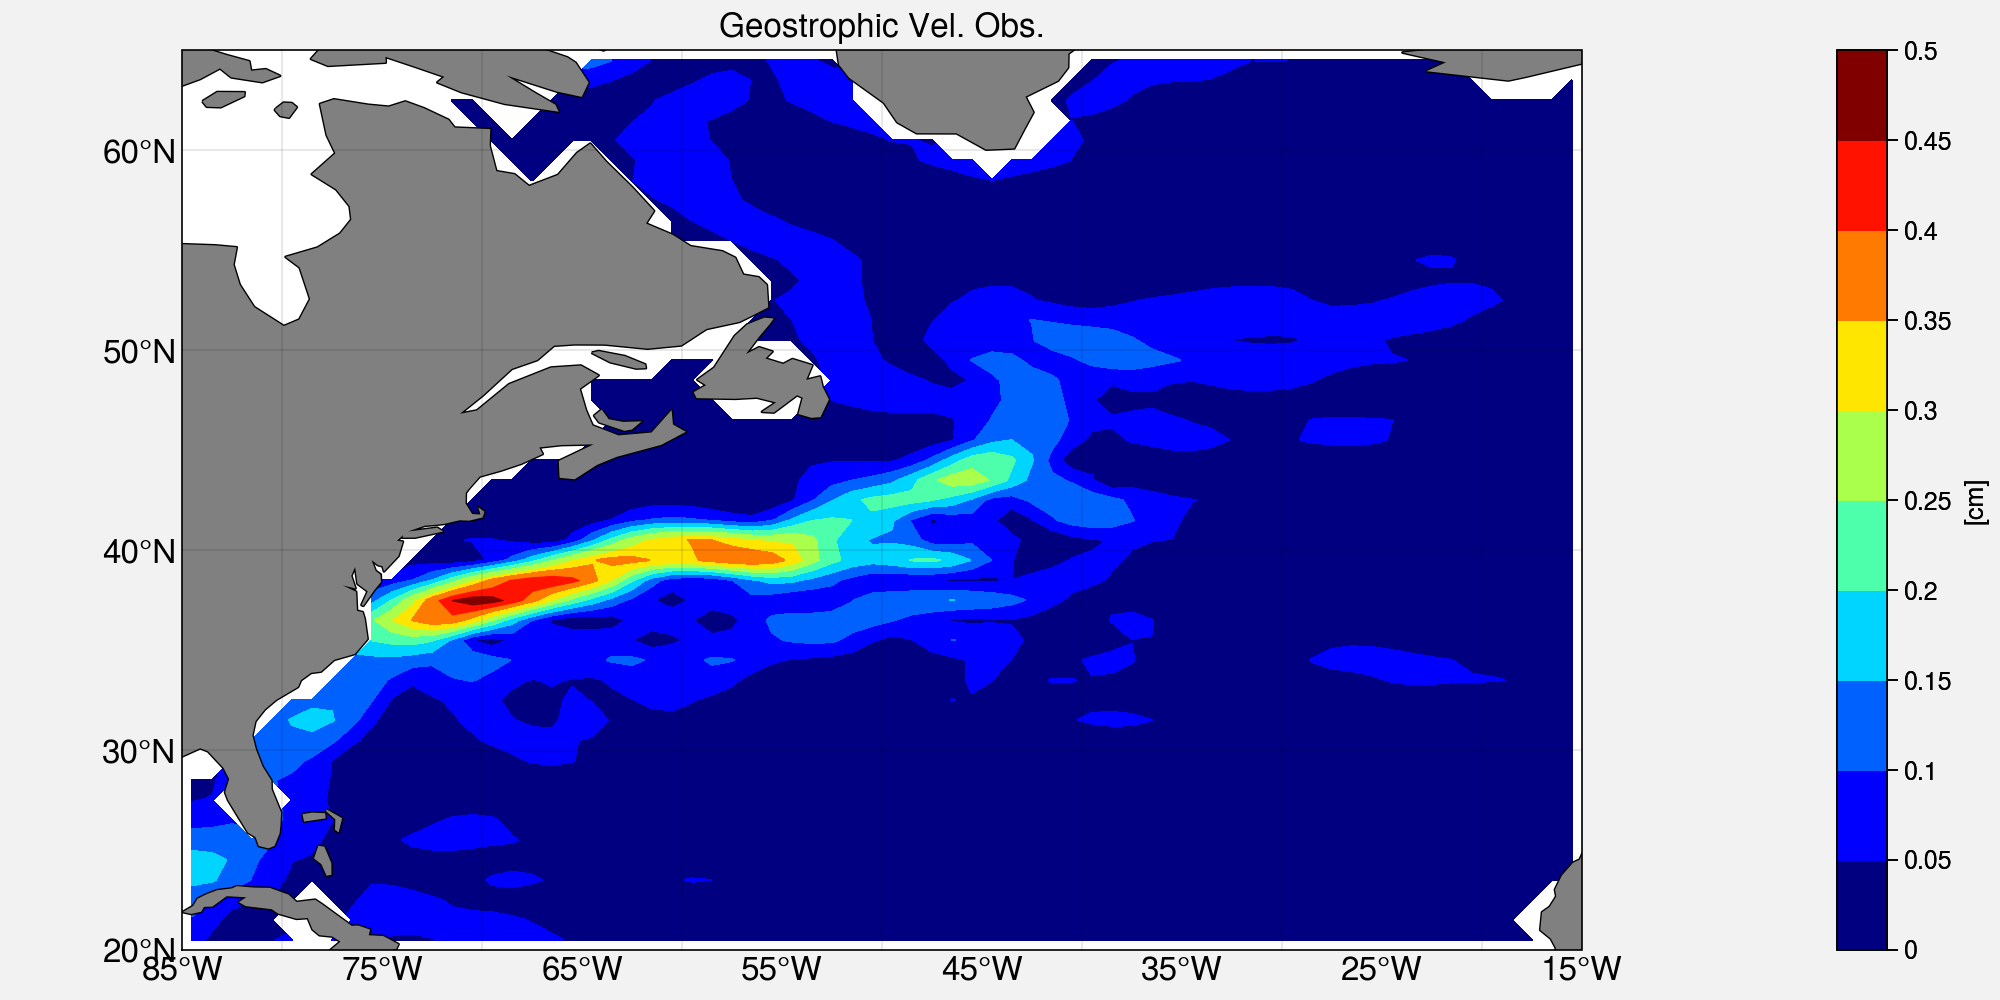

In [11]:
# to do : add lat and lon values, add blue * in Boston and red * in Cape Hatters, add a,b,c
# in subplots
pc = cartopy.crs.PlateCarree()

fig1, axs = plot.subplots(nrows=1,ncols=1,proj='cyl',width='10in', height='5in')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

m11=axs.contourf(ssh1_NA_obs.lon, ssh1_NA_obs.lat, 
        xr.ufuncs.sqrt(Ug**2+Vg**2), transform=pc,
                 levels=np.arange(0,0.5+0.01,0.05),vmin=0,vmax=0.5,cmap='jet')
axs.coastlines(resolution='110m', color='black', linewidth=1)
axs.format(land=True, landcolor='grey')
axs.set_extent([lon1, lon2, lat1, lat2], crs=pc)
axs.set_xticks(np.arange(-85,-15+1,10), crs=pc)
axs.set_xticklabels(np.arange(-85,-15+1,10), fontsize=12)
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(20,60+1,10), crs=pc)
axs.set_yticklabels(np.arange(20,60+1,10), fontsize=12)
axs.yaxis.set_major_formatter(lat_formatter)
axs.set_title('Geostrophic Vel. Obs.', fontsize=12)
cb = axs.colorbar(m11,loc='r',label='[cm]',width='2em',shrink=1)